
# Intro to Plotting with Matplotlib

Today we're going to take our first steps into the wide world of plotting in Python using the Matplotlib library. This is the most used plotting package and the basis of many other popular voisualization packages.

## Learning Objective

The goal of data visualization is to learn and communicate insights about a dataset, in the initial examples we will use simple functions y=F(x) as the basis for our charts before moving onto working with more complex sample datasets.
At the end of this notebook you will be able to:

*    Import the required libraries into a notebook
*    Understand the differences of working with Matplotlib in notebooks versus in scripts
*    Create plots based on simple datasets
*    Create structures containing multiple charts
*    Understand how to work with matplotlib objects
*    Resize and add titles to figures and charts



*    Modify the elements of a chart such as the axis, line type and colour
*    Create histograms to visualise distributions

We'll be diving into Pandas DataFrames, which are objects that will hold our data, allowing us to interact with it, manipulate it, and eventually throw it into machine learning algorithms (if we want).

Since a Pandas DataFrame is an object, this means that we're going to interact with it in much the same way that we interact with all of our other objects in python. Before we get to actually interacting with DataFrames, though, we'll have to get one, and get one with data in it! There's one quick step that we have to do before that...
Pandas Import

Source: Python Data Science Handbook by Jake VanderPlas, published by O'Reilly

### Import Matplotlib

In [1]:
import matplotlib # Imports enture matplotlib library
import matplotlib.pyplot as plt # Imports the plotting interface and gives a shortcut
import numpy as np # we will use numpy to generate the data used in our sample charts

### Understand your coding environment
Matplotlib can be used to create charts in many contexts, and it is important to write your code depending on how and where it will be run.
When working with matplotlib in a script that will be run as a .py file, the function plt.show() needs to be executed to render any chart that has been created in the script.

Here, We are working in a Jupyter notebook environment so the plt.show() function is not necessary instead we need to tell our machine to render the images below our code or 'inline'
We use the magic function `%matplotlib inline` to have the charts displayed in the notebook.
     


In [2]:
%matplotlib inline

### First Plot!
We will create some x and y values and display this in a simple chart

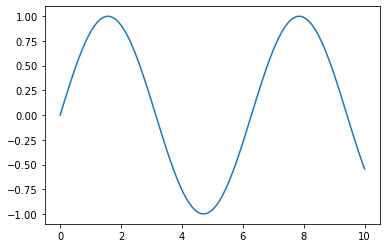

In [3]:
x = np.linspace(0, 10, 100) # create an array of numbers to use as our x values
y = np.sin(x) # generates corrosponding y values based on the sin function
fig = plt.figure() # initializes the figure
plt.plot(x, y) # plots the points based on the values for x and y

We can plot additional curves on the same plot by calling the plt.plot method multiple times in a single code block
We can also suppress the output of the python output `[<matplotlib.lines.Line2D at 0x7fdb5779b550>]`by using a ';' at the end of the code block, which results in a cleaner display.

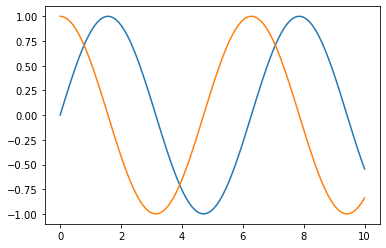

In [4]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Notice matplotlib automatically sets differnt colours for the lines. The default values as for colour choice as well as general chart properties can be set explicity using the style tool.
When we tell matplotlib to use the 'fivethrityeight' style all subsequent plots will take on new default characteristics (based on the style of Nate Silvers' website).

In [25]:
plt.style.use('fivethirtyeight')

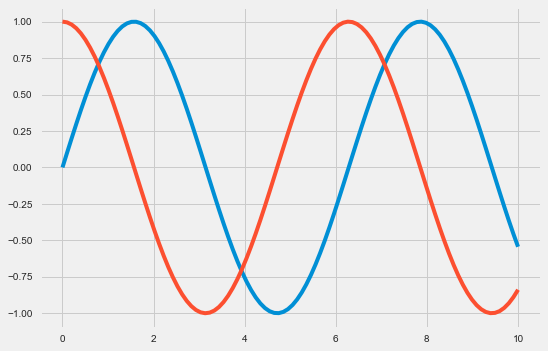

In [26]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

We will come back to adjusting the chart elements in the next section. In the meantime see here for more styles: 
https://matplotlib.org/2.0.2/examples/style_sheets/style_sheets_reference.html

### Building Figures and Axes
Up to know we have plotted two lines a single chart in a frame. The power of Matplotlib comes from being able to display multiple charts in a frame. There are two ways to do this and understanding whihc one you are using is key to being able to interact nicely with the objects you create.

### Interface 1: MATLAB-style
Matplotlib was built as a opensource alternative for MATLAB (sounds similar rolling off the tounge somehow). In this interface the 'plt' contains all the tools for manipulating the charts.

Create two panels in a figure:

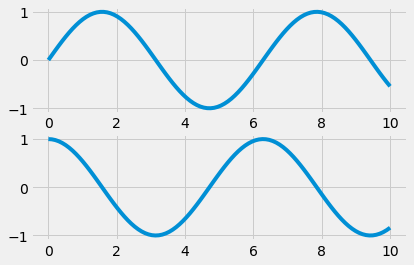

In [7]:
plt.figure()  # create the frame that will hold the subsequently generated panels where the charts will live.

# creates structure of subplots in the figure in configuration 1 rows x columns, and 'activate panel number 1
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x)) # plots the line on the activated panel

# activates panel number 2
plt.subplot(2, 1, 2)  
plt.plot(x, np.cos(x));

We can make additional columns and populate the frames similarly. We can also change the size of the figure to allow more space for our charts and add individual titles.

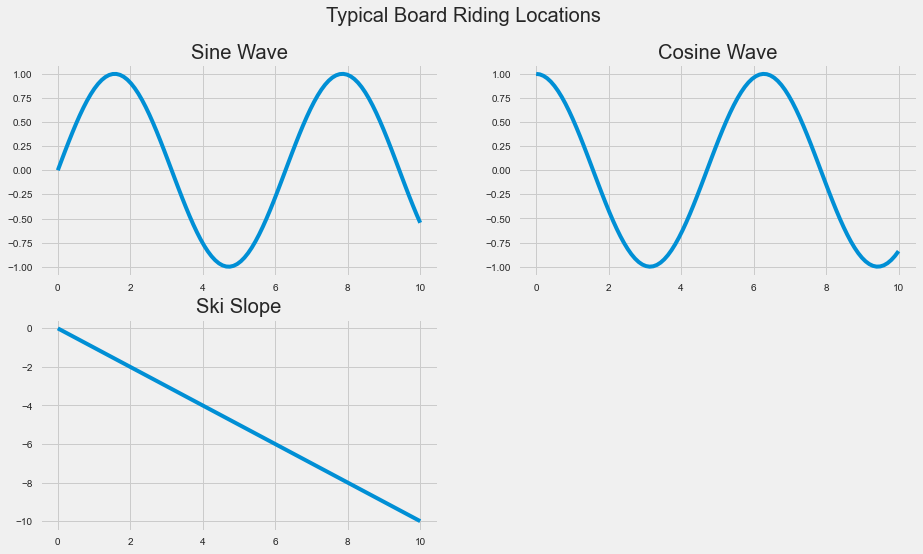

In [40]:
plt.figure(figsize=(14,8))  # figsize=(float, float) : Width, height in inches
plt.suptitle('Typical Board Riding Locations', fontsize=20)

plt.subplot(2, 2, 1)
plt.plot(x, np.sin(x))
plt.title('Sine Wave')

plt.subplot(2, 2, 2)  
plt.plot(x, np.cos(x))
plt.title('Cosine Wave')

plt.subplot(2, 2, 3)  
plt.plot(x, -1*x)
plt.title('Ski Slope');

In [ ]:
Each time you activate the panel, any subsequent code will affect this chart. One drawback with the MATLAB style interface is that it is inconvenient to reactivate the first panel.

### Object-oriented interface

This alternative interdace is for more complex frames where you will work with a number of charts and want to interact with each one independantly.
Each chart is then a panel object that can be worked on with the built in methods. 
The panels or axes are contained within the array 'ax' and can be called using positional referencing i.e. `ax[0]` for the 1st axes or `ax[1,3]` for the panel in the 2nd row and 4th column (consider 0 is the 1st position)

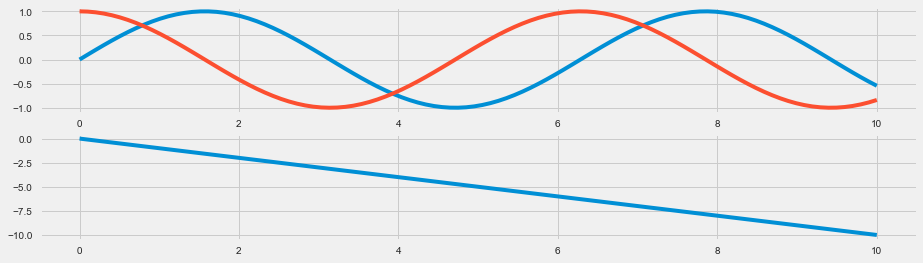

In [74]:


# Create a grid of plots
# ax will be a 1 dimentional array of two Axes objects
fig, ax = plt.subplots(2, figsize=(14,4)) # is equiveltent to (2,1)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, -1 * x)
ax[0].plot(x, np.cos(x)); # we can easily act on the first axes even after referencing the second.



In [ ]:
## Differences between MATLAB and Object-oriented interfaces

In many cases plt functions can be switched to ax methods directly but there are some differences to look out for.

Same:
plt.plot() → ax.plot(), 
plt.legend() → ax.legend()    

Different:
plt.xlabel() → ax.set_xlabel()
plt.ylabel() → ax.set_ylabel()
plt.xlim() → ax.set_xlim()
plt.ylim() → ax.set_ylim()
plt.title() → ax.set_title()


If we want to label our charts we can do this considering the above

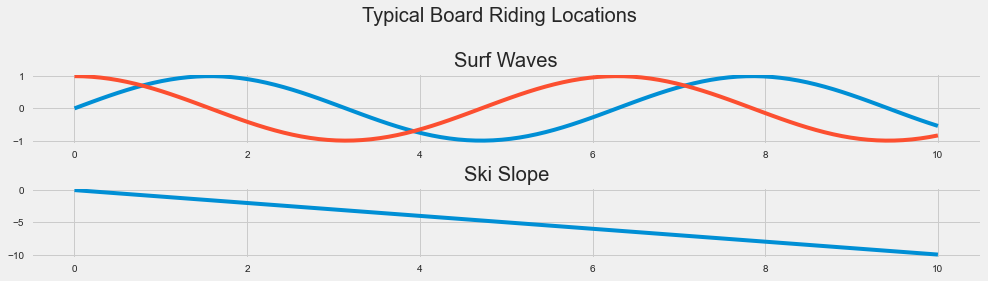

In [105]:
fig, ax = plt.subplots(2, figsize=(14,4)) # is equiveltent to (2,1)
plt.suptitle('Typical Board Riding Locations', fontsize=20)
fig.tight_layout(h_pad=2) # Creates space between axes for subplot titles. Try commenting out to see default behaviour
plt.subplots_adjust(top=0.75) # Creates space between figure title and 1st subplot title.

ax[0].plot(x, np.sin(x))
ax[0].plot(x, np.cos(x))
ax[1].plot(x, -1 * x)

ax[0].set_title('Surf Waves')
ax[1].set_title('Ski Slope');
